In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# problem definition
Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.
 
Feature description is:

1. objid = Object Identifier
2. ra = J2000 Right Ascension (r-band)
3. dec = J2000 Declination (r-band)
4. u = better of DeV/Exp magnitude fit
5. g = better of DeV/Exp magnitude fit
6. r = better of DeV/Exp magnitude fit
7. i = better of DeV/Exp magnitude fit
8. z = better of DeV/Exp magnitude fit
9. run number, which identifies the specific scan,
10. the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
11. the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
12. An additional number, rerun, specifies how the image was processed.
13. specobjid = Object Identifier
14. class = object class (galaxy, star or quasar object)  (TARGET VARIABLE)
15. redshift = Final Redshift
16. plate = plate number
17. mjd = MJD of observation
18. fiberid = fiber ID



In [2]:
df=pd.read_csv("skyserver.csv")
df.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


# EDA

In [3]:
df.shape  # checking the rows and cols count

(10000, 18)

In [4]:
df.columns # checking the various cols

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
df.dtypes # checking the datatypes of cols

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [6]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Key Observations here

1. Mean and median in most of features are almost same other than dec,run and plate .
2.  There is huge difference in 75% and max values of many variables like ra,dec,r,i,z, run,field, redshift,plate,fiberid
3. Few Outliers are there

In [7]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [8]:
df.isnull() # checking for any null values

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum() # null  values column wise counts

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [10]:
df["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

<AxesSubplot:>

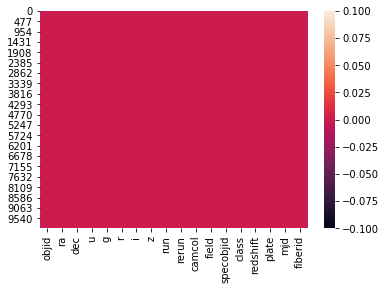

In [11]:
sns.heatmap(df.isnull())

# transforming nominal values to numerical so as to get the better bivariate analysis and correlation between variables and target.


#tranforming the target variable

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
df["class"]=le.fit_transform(df["class"])
df.tail(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,0,0.118417,447,51877,233


In [14]:
df_cor=df.corr()  #checking the correlation
df_cor

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,-3.355500e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.321896e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,-5.891815e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,-2.690437e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,-9.921163e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.962769e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,1.467908e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,2.157584e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,-7.816172e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df["camcol"].unique()

array([4, 2, 1, 5, 6, 3])

<AxesSubplot:>

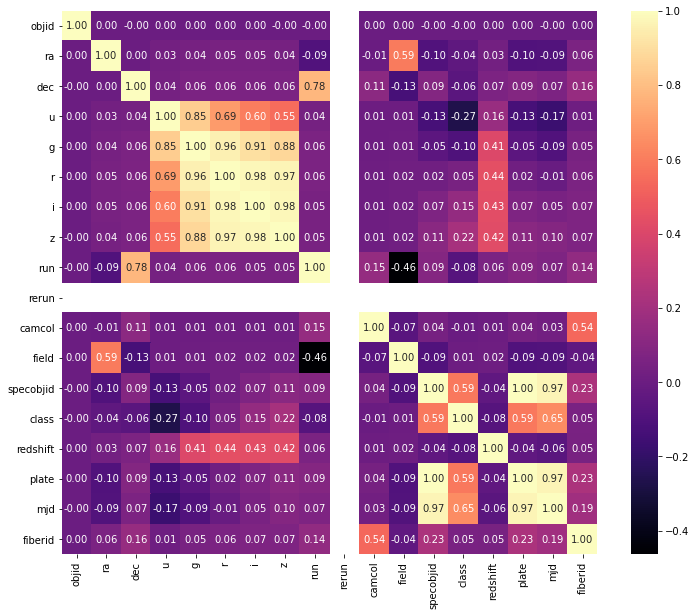

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

key observations here
1. plate and mjd are highly correlated with each other
2. specobjid,plate,mjd are highly correlated with target class
3. specojid is highly correlated with plate,mjd
4. variable u  is negitively correlated with target variable (class)
5. u,g,i,r,z  are positively correlated

# Data Visualization

Univariate Analysis & Bivariate Analysis

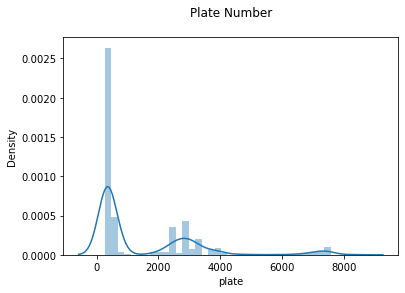

In [17]:
sns.distplot(df["plate"])
plt.title("Plate Number\n")
plt.show()  # shows positively skewed

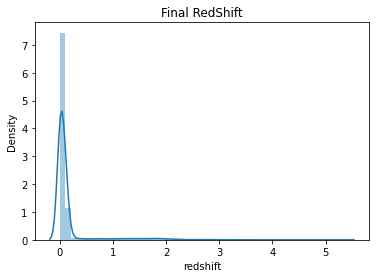

In [18]:
sns.distplot(df["redshift"])
plt.title("Final RedShift")
plt.show() # showing positively skewed

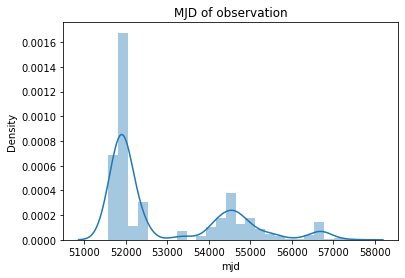

In [19]:
sns.distplot(df["mjd"])
plt.title("MJD of observation")
plt.show() # showing skewness

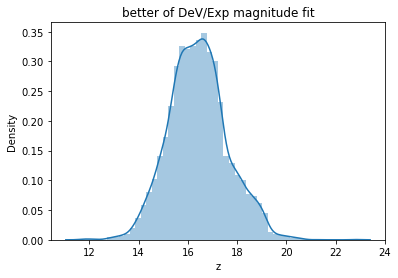

In [20]:
sns.distplot(df["z"])
plt.title("better of DeV/Exp magnitude fit")
plt.show() # showing z value is normalised

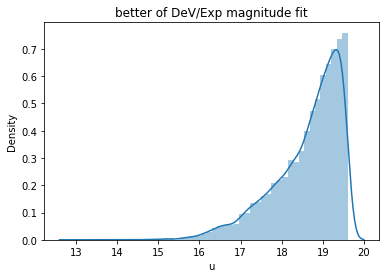

In [21]:
sns.distplot(df["u"])
plt.title("better of DeV/Exp magnitude fit")
plt.show()  # showing data is negitively skewed

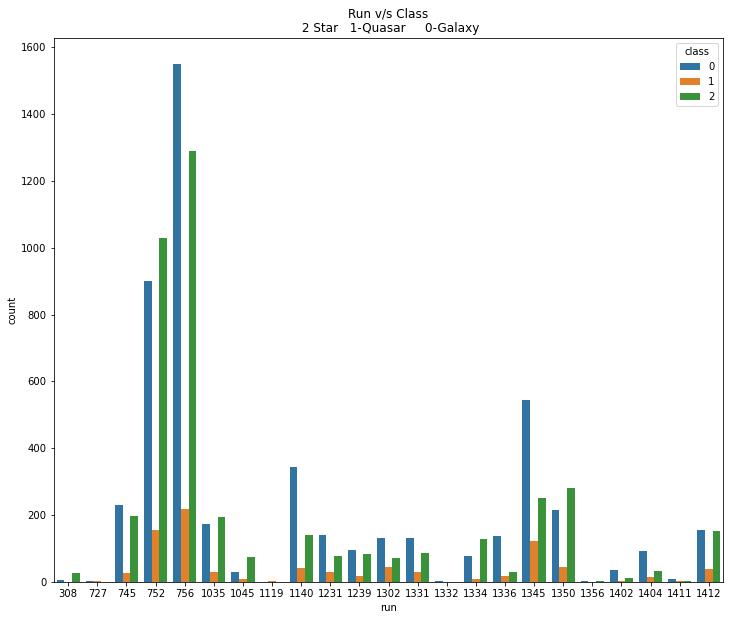

In [22]:
plt.figure(figsize=(12,10))
sns.countplot(x ='run',hue='class', data = df)
plt.title('Run v/s Class\n 2 Star   1-Quasar     0-Galaxy')
plt.show()

Text(0.5, 1.0, 'MJD Observation for Quasar\n')

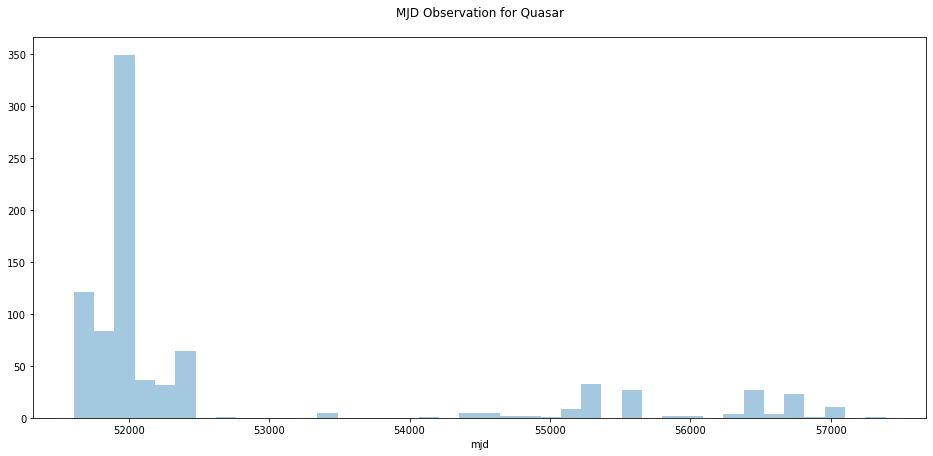

In [23]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['class']==1]['mjd'],kde=False,bins=40)
plt.title('MJD Observation for Quasar\n')


above plot shows MJD values for Quasar is mostly concentrated near52000

Text(0.5, 1.0, 'MJD observation for Star\n')

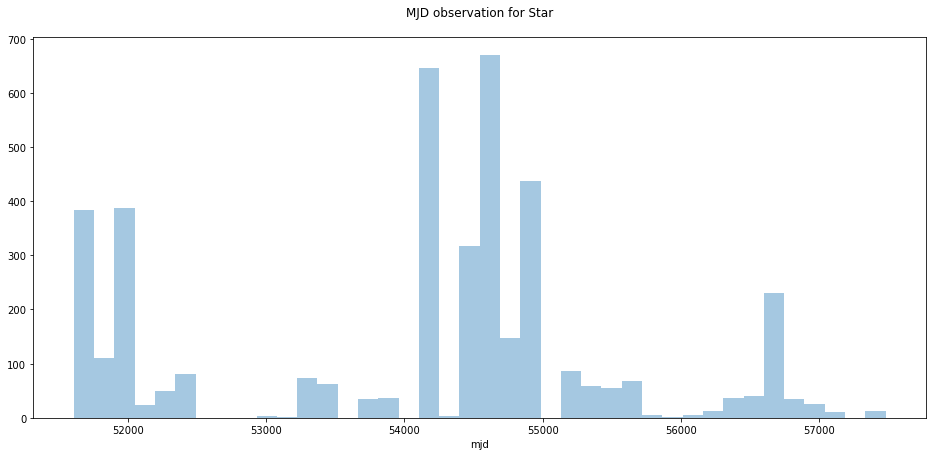

In [24]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['class']==2]['mjd'],kde=False,bins=40)
plt.title('MJD observation for Star\n')

MJD values are scattered mainly near 52000,54000-55000 and around56500 in class variable STAR

Text(0.5, 1.0, 'MJD observation for Galaxy\n')

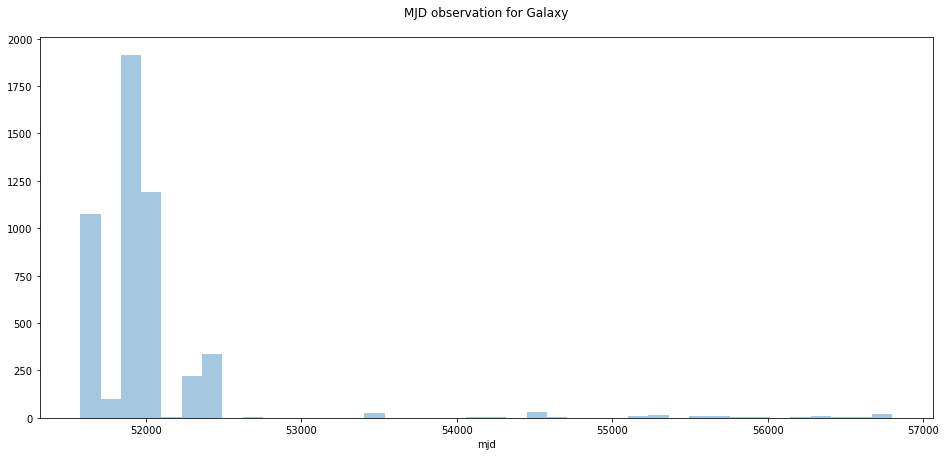

In [25]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['class']==0]['mjd'],kde=False,bins=40)
plt.title('MJD observation for Galaxy\n')

MJD observation is mainly lies around 52000 when class is Galaxy

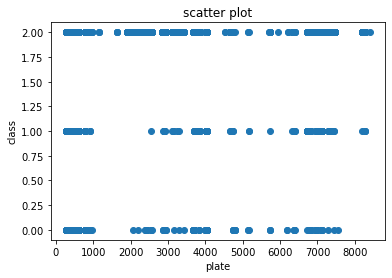

In [26]:
plt.scatter(df["plate"],df["class"])
plt.title("scatter plot")
plt.xlabel("plate")
plt.ylabel("class")
plt.show()

 above plot shows Plate Number values for class Star,Quasar,Galaxy 

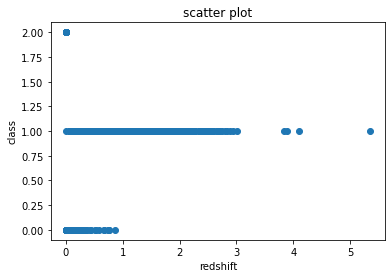

In [27]:
plt.scatter(df["redshift"],df["class"])
plt.title("scatter plot")
plt.xlabel("redshift")
plt.ylabel("class")
plt.show()

above plot shows redshift values are mostly scattered in Quasar

# plotting the outliers

<AxesSubplot:>

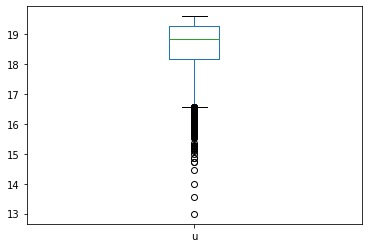

In [28]:
df["u"].plot.box()

<AxesSubplot:>

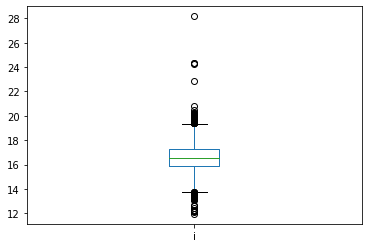

In [29]:
df["i"].plot.box()

<AxesSubplot:>

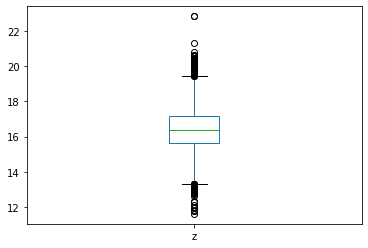

In [30]:
df["z"].plot.box()

<AxesSubplot:>

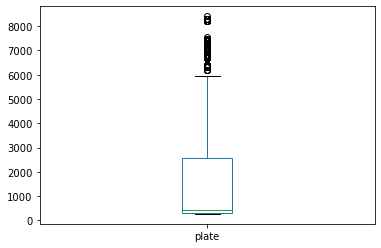

In [31]:
df["plate"].plot.box()

In [32]:
collist=df.columns.values
ncol=12
nrows=10

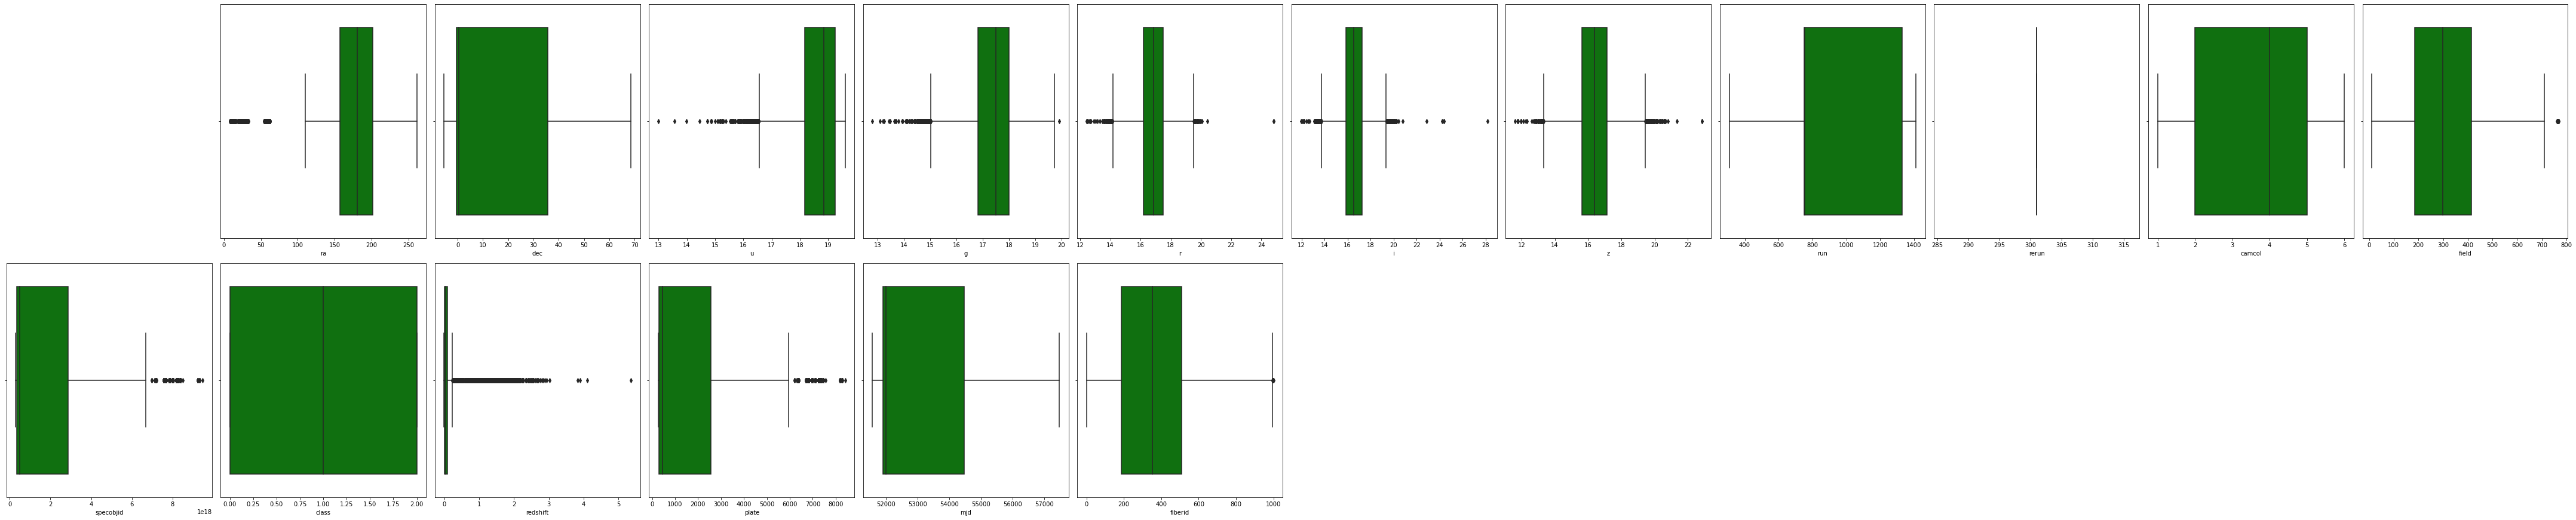

In [33]:
plt.figure(figsize=(5*ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

All the above boxplot shows outliers are present 
But that big differences of values in variables might be good as these are predicting the target. not removing the outliers

In [34]:
# dividing the x varaibles features from y variable target (class)
x=df.drop(columns=["class"])
y=df[["class"]]

In [35]:
print(x.shape ,"\t" , y.shape)

(10000, 17) 	 (10000, 1)


# To check the distribution of skewness

In [36]:
df.skew()  # shows  very little skewness

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [37]:
# removing skewness by transforming data
from sklearn.preprocessing import power_transform

In [38]:
x=power_transform(x,method='yeo-johnson')

# Model Training

Logistic REgression

In [39]:
# scaling the input variable
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
scaledX=minmax.fit_transform(x)

In [40]:
# importing our model libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [55]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    predlr=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,predlr)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 98.88 Random state 69


In [56]:
# breaking out input and output variable into train and test data with bst random state
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=69)

In [57]:
x_train.shape , y_train.shape,x_test.shape,y_test.shape

((7500, 17), (7500, 1), (2500, 17), (2500, 1))

In [58]:
#using algorithms in for loops and finding cross validation score
model=[LogisticRegression(),AdaBoostClassifier(),MultinomialNB(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Accuracy score of " , m , "is " , accuracy_score(y_test,y_pred))
    print("confusion matrix of " , m , "is \n",confusion_matrix(y_test,y_pred))
    print("classification report of " , m, "is \n",classification_report(y_test,y_pred))
    print("**********************************************************************\n")

Accuracy score of  LogisticRegression() is  0.9888
confusion matrix of  LogisticRegression() is 
 [[1210    3   13]
 [  11  217    0]
 [   1    0 1045]]
classification report of  LogisticRegression() is 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1226
           1       0.99      0.95      0.97       228
           2       0.99      1.00      0.99      1046

    accuracy                           0.99      2500
   macro avg       0.99      0.98      0.98      2500
weighted avg       0.99      0.99      0.99      2500

**********************************************************************

Accuracy score of  AdaBoostClassifier() is  0.8916
confusion matrix of  AdaBoostClassifier() is 
 [[1218    6    2]
 [ 196   32    0]
 [  66    1  979]]
classification report of  AdaBoostClassifier() is 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      1226
           1       0.82     

# hyperparameter tuning

In [59]:
rfc=RandomForestClassifier()
# Create the parameter grid based on the results of random search 
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [60]:
rfc = RandomForestClassifier()

g_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 

                          cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [61]:
#finding the best parameters 
g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 10}


In [62]:
# using RandomForestClasifier with best parameters
rf=RandomForestClassifier(max_depth=10,bootstrap=True,n_estimators=10)
rf.fit(x_train,y_train)
predrfc=rf.predict(x_test)
print("Accuracy score of is " , accuracy_score(y_test,predrfc))
print("confusion matrix of is \n",confusion_matrix(y_test,predrfc))
print("classification report of is \n",classification_report(y_test,predrfc))
print("**********************************************************************\n")

Accuracy score of is  0.9924
confusion matrix of is 
 [[1218    5    3]
 [  11  217    0]
 [   0    0 1046]]
classification report of is 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1226
           1       0.98      0.95      0.96       228
           2       1.00      1.00      1.00      1046

    accuracy                           0.99      2500
   macro avg       0.99      0.98      0.99      2500
weighted avg       0.99      0.99      0.99      2500

**********************************************************************



In [63]:
# cross validating RandomForestClasifier
score=cross_val_score(rf,scaledX,y,cv=5,scoring='accuracy')
print("Cross Validation Score : ", score,"\n")
print("Mean" , score.mean())
print("Standard Deviation" , score.std())

Cross Validation Score :  [0.989  0.989  0.9885 0.983  0.9875] 

Mean 0.9874
Standard Deviation 0.002267156809750935


# Conclusion

RandomForestClasifier is performing best among all above with accuaracy score .99

# Saving the model- Serialization

In [64]:
# saving the prediction model

import pickle
filename="SpaceServer.pkl"
pickle.dump(predrfc,open(filename,'wb'))